# Received Signal Strength (RSS) Data Cleaning and Augmentation
> by Daniel Andrew

The goal of this Python Notebook is to show a manual way of cleaning and preprocessing data and also in attempt to train the data using fully-connected neural network.

Expected result of this Python Notebook is training summary of the preprocessed data as well as the evaluation of the model.

## Library Import and Load Data

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from google.colab import files

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the dataset from Google Drive
path = '/content/drive/MyDrive/WiFi-TEEP/full_rssi_d1.csv'
df = pd.read_csv(path, delimiter=';')

In [ ]:
df.xr.unique()

array(['63,60522109', '457,0153478', '841,0024775', '1102,490646',
       '47,11497625', '433,4578552', '777,3972475', '1083,644652',
       '414,6118611', '767,9742504', '51,82647478', '412,2561119',
       '744,4167578', '1081,288902'], dtype=object)

In [ ]:
df.yr.unique()

array(['1269,452828', '1271,80861', '1276,520176', '1276,83423',
       '1615,752889', '1608,685541', '1606,329758', '1599,26241',
       '1896,091034', '1889,023685', '1886,667903', '1891,379468',
       '2129,313524', '2134,025089', '2136,380872'], dtype=object)

In [ ]:
df.describe()

,Unnamed: 0,rssi_D1_1F_AP01,rssi_D1_1F_AP02,rssi_D1_1F_AP03,rssi_D1_1F_AP04,rssi_D1_1F_AP05,rssi_D1_1F_AP06,rssi_D1_1F_AP07,rssi_D1_1F_AP08
count,1423.000000,636.000000,710.000000,567.000000,478.000000,656.000000,303.000000,55.000000,184.000000
mean,6861.810963,74.883648,85.716901,86.890653,86.730126,40.426829,71.171617,75.090909,85.038043
std,4239.693957,6.547872,3.052918,4.005125,3.866804,8.774398,6.230420,11.481503,4.001867
min,0.000000,62.000000,76.000000,70.000000,75.000000,0.000000,59.000000,0.000000,75.000000
25%,2001.000000,68.000000,84.000000,85.000000,85.000000,37.000000,67.000000,73.000000,82.000000
50%,9244.000000,76.000000,87.000000,88.000000,86.000000,41.000000,70.000000,75.000000,85.500000
75%,9715.500000,80.000000,87.750000,90.000000,90.000000,44.000000,76.000000,76.000000,89.000000
max,11646.000000,86.000000,92.000000,93.000000,93.000000,58.000000,85.000000,89.000000,92.000000


In [ ]:
df.columns

Index(['Unnamed: 0', 'rssi_D1_1F_AP01', 'rssi_D1_1F_AP02', 'rssi_D1_1F_AP03',
       'rssi_D1_1F_AP04', 'rssi_D1_1F_AP05', 'rssi_D1_1F_AP06',
       'rssi_D1_1F_AP07', 'rssi_D1_1F_AP08', 'EIRP', 'essid', 'band', 'chan',
       'ch_width', 'ht_type', 'Long', 'Lat', 'xr', 'yr'],
      dtype='object')

In [ ]:
df = df.drop(columns='Unnamed: 0')

In [ ]:
df.sample(10)

,rssi_D1_1F_AP01,rssi_D1_1F_AP02,rssi_D1_1F_AP03,rssi_D1_1F_AP04,rssi_D1_1F_AP05,rssi_D1_1F_AP06,rssi_D1_1F_AP07,rssi_D1_1F_AP08,EIRP,essid,band,chan,ch_width,ht_type,Long,Lat,xr,yr
1156,76.0,87.0,78.0,NaN,NaN,NaN,NaN,NaN,AP:2.4GHz-HT:6/9.0/26.5/0,26/07/2023_Crawl13,2.4GHz,6,20MHz,HT,25.012.596.915.588.900,12.154.251.163.825.300,"51,82647478","2129,313524"
502,81.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,AP:2.4GHz-HT:6/9.0/26.5/0,01/08/2023_Crawl6,2.4GHz,11,20MHz,VHT,25.012.644.916.911.700,12.154.250.107.705.500,"433,4578552","1608,685541"
358,NaN,NaN,88.0,NaN,49.0,NaN,NaN,NaN,AP:2.4GHz-HT:6/9.0/27.7/0,26/07/2023_Crawl4,2.4GHz,6,20MHz,HT,25.012.697.508.047.800,1.215.425.278.991.460,"1102,490646","1276,83423"
878,73.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,AP:2.4GHz-HT:6/9.0/26.5/0,01/08/2023_Crawl9,2.4GHz,6,20MHz,HT,25.012.613.787.320.800,12.154.249.420.389.500,"47,11497625","1896,091034"
1282,64.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,AP:2.4GHz-HT:11/9.0/23.5/0,31/07/2023_Crawl15,2.4GHz,6,20MHz,HT,2.501.263.400.299.650,12.154.255.991.801.600,"744,4167578","2134,025089"
734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0,AP:2.4GHz-HT:11/9.0/25.2/0,01/08/2023_Crawl8,2.4GHz,11,20MHz,VHT,2.501.268.139.631.490,12.154.254.533.350.400,"1083,644652","1599,26241"
1077,70.0,NaN,NaN,87.0,38.0,NaN,NaN,NaN,AP:2.4GHz-HT:11/9.0/23.5/0,2024/08/01_Crawl12,2.4GHz,1,20MHz,VHT,25.012.663.034.524.900,12.154.256.343.841.500,"1083,644652","1891,379468"
150,NaN,NaN,92.0,NaN,42.0,NaN,NaN,NaN,AP:2.4GHz-HT:11/9.0/23.5/0,31/07/2023_Crawl2,2.4GHz,11,20MHz,VHT,25.012.660.420.659.400,1.215.424.866.601.820,"457,0153478","1271,80861"
121,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,AP:2.4GHz-HT:1/9.0/25.5/0,31/07/2023_Crawl2,2.4GHz,11,20MHz,VHT,25.012.660.420.659.400,1.215.424.866.601.820,"457,0153478","1271,80861"
1063,63.0,85.0,87.0,NaN,NaN,NaN,NaN,NaN,AP:2.4GHz-HT:11/9.0/23.5/0,2024/08/01_Crawl12,2.4GHz,1,20MHz,VHT,25.012.663.034.524.900,12.154.256.343.841.500,"1083,644652","1891,379468"


## Data Cleaning

### Extract Current and Max Transmit Power from EIRP

In [ ]:
def split_curr_eirp(val):
  return val.split('/')[1]

def split_max_eirp(val):
  return val.split('/')[2]

test_str = "AP:2.4GHz-HT:11/9.0/23.5/0"

#print(split_curr_eirp(test_str))

In [ ]:
df['cur_eirp'] = df['EIRP'].apply(split_curr_eirp)

In [ ]:
df['max_eirp'] = df['EIRP'].apply(split_max_eirp)

In [ ]:
df.columns

Index(['rssi_D1_1F_AP01', 'rssi_D1_1F_AP02', 'rssi_D1_1F_AP03',
       'rssi_D1_1F_AP04', 'rssi_D1_1F_AP05', 'rssi_D1_1F_AP06',
       'rssi_D1_1F_AP07', 'rssi_D1_1F_AP08', 'EIRP', 'essid', 'band', 'chan',
       'ch_width', 'ht_type', 'Long', 'Lat', 'xr', 'yr', 'cur_eirp',
       'max_eirp'],
      dtype='object')

In [ ]:
df.sample(10)

,rssi_D1_1F_AP01,rssi_D1_1F_AP02,rssi_D1_1F_AP03,rssi_D1_1F_AP04,rssi_D1_1F_AP05,rssi_D1_1F_AP06,rssi_D1_1F_AP07,rssi_D1_1F_AP08,EIRP,essid,band,chan,ch_width,ht_type,Long,Lat,xr,yr,cur_eirp,max_eirp
657,68.0,NaN,86.0,91.0,36.0,NaN,NaN,NaN,AP:2.4GHz-HT:6/9.0/27.7/0,01/08/2023_Crawl8,2.4GHz,11,20MHz,VHT,2.501.268.139.631.490,12.154.254.533.350.400,"1083,644652","1599,26241",9.0,27.7
1271,68.0,81.0,86.0,NaN,NaN,NaN,NaN,NaN,AP:2.4GHz-HT:11/9.0/23.5/0,31/07/2023_Crawl15,2.4GHz,6,20MHz,HT,2.501.263.400.299.650,12.154.255.991.801.600,"744,4167578","2134,025089",9.0,23.5
668,NaN,NaN,85.0,90.0,NaN,NaN,NaN,NaN,AP:2.4GHz-HT:1/9.0/25.5/0,01/08/2023_Crawl8,2.4GHz,11,20MHz,VHT,2.501.268.139.631.490,12.154.254.533.350.400,"1083,644652","1599,26241",9.0,25.5
768,72.0,84.0,90.0,88.0,NaN,69.0,NaN,86.0,AP:2.4GHz-HT:11/9.0/25.2/0,01/08/2023_Crawl8,2.4GHz,11,20MHz,VHT,2.501.268.139.631.490,12.154.254.533.350.400,"1083,644652","1599,26241",9.0,25.2
159,81.0,87.0,91.0,NaN,43.0,84.0,NaN,NaN,AP:2.4GHz-HT:11/9.0/23.5/0,31/07/2023_Crawl2,2.4GHz,11,20MHz,VHT,25.012.660.420.659.400,1.215.424.866.601.820,"457,0153478","1271,80861",9.0,23.5
1377,NaN,87.0,NaN,NaN,NaN,NaN,NaN,NaN,AP:2.4GHz-HT:6/9.0/26.5/0,31/07/2023_Crawl16,2.4GHz,6,20MHz,HT,25.012.649.050.752.900,12.154.258.020.222.100,"1081,288902","2136,380872",9.0,26.5
268,NaN,NaN,NaN,NaN,42.0,78.0,NaN,NaN,AP:2.4GHz-HT:6/9.0/27.7/0,31/07/2023_Crawl3,2.4GHz,11,20MHz,VHT,25.012.681.092.319.900,12.154.251.012.951.100,"841,0024775","1276,520176",9.0,27.7
752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0,AP:2.4GHz-HT:11/9.0/25.2/0,01/08/2023_Crawl8,2.4GHz,11,20MHz,VHT,2.501.268.139.631.490,12.154.254.533.350.400,"1083,644652","1599,26241",9.0,25.2
938,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,AP:2.4GHz-HT:6/9.0/26.5/0,01/08/2023_Crawl10,2.4GHz,6,20MHz,HT,2.501.263.065.905.040,12.154.251.750.558.600,"414,6118611","1889,023685",9.0,26.5
1261,64.0,80.0,NaN,NaN,33.0,64.0,NaN,NaN,AP:2.4GHz-HT:11/9.0/23.5/0,31/07/2023_Crawl15,2.4GHz,6,20MHz,HT,2.501.263.400.299.650,12.154.255.991.801.600,"744,4167578","2134,025089",9.0,23.5


In [ ]:
df.cur_eirp.unique()

array(['9.0'], dtype=object)

### Convert XR and YR dtype to Float

In [ ]:
df['xr'] = df['xr'].str.replace(',', '.').astype(float)
df['yr'] = df['yr'].str.replace(',', '.').astype(float)

In [ ]:
df['xr'].unique()

array([  63.60522109,  457.0153478 ,  841.0024775 , 1102.490646  ,
         47.11497625,  433.4578552 ,  777.3972475 , 1083.644652  ,
        414.6118611 ,  767.9742504 ,   51.82647478,  412.2561119 ,
        744.4167578 , 1081.288902  ])

### Remove Any Rows that has all zero values

In [ ]:
aps = ['rssi_D1_1F_AP01', 'rssi_D1_1F_AP02', 'rssi_D1_1F_AP03', 'rssi_D1_1F_AP04', 'rssi_D1_1F_AP05', 'rssi_D1_1F_AP06', 'rssi_D1_1F_AP07', 'rssi_D1_1F_AP08']

In [ ]:
rows_zero = df[aps].isin([0]).all(axis=1)
df = df[~rows_zero]
df[rows_zero]

,rssi_D1_1F_AP01,rssi_D1_1F_AP02,rssi_D1_1F_AP03,rssi_D1_1F_AP04,rssi_D1_1F_AP05,rssi_D1_1F_AP06,rssi_D1_1F_AP07,rssi_D1_1F_AP08,EIRP,essid,band,chan,ch_width,ht_type,Long,Lat,xr,yr,cur_eirp,max_eirp


In [ ]:
df[aps].isnull().sum()

rssi_D1_1F_AP01     787
rssi_D1_1F_AP02     713
rssi_D1_1F_AP03     856
rssi_D1_1F_AP04     945
rssi_D1_1F_AP05     767
rssi_D1_1F_AP06    1120
rssi_D1_1F_AP07    1368
rssi_D1_1F_AP08    1239
dtype: int64

### Convert Missing Values to 0 (Temporarily)

In [ ]:
max_val = df[aps].max().max()
print(df[aps].min().min())

0.0


In [ ]:
df[aps] = df[aps].fillna(0)

In [ ]:
df.sample(100)

,rssi_D1_1F_AP01,rssi_D1_1F_AP02,rssi_D1_1F_AP03,rssi_D1_1F_AP04,rssi_D1_1F_AP05,rssi_D1_1F_AP06,rssi_D1_1F_AP07,rssi_D1_1F_AP08,EIRP,essid,band,chan,ch_width,ht_type,Long,Lat,xr,yr,cur_eirp,max_eirp
730,100.0,100.0,100.0,100.0,38.0,100.0,100.0,100.0,AP:2.4GHz-HT:1/9.0/27.0/1,01/08/2023_Crawl8,2.4GHz,11,20MHz,VHT,2.501.268.139.631.490,12.154.254.533.350.400,1083.644652,1599.262410,9.0,27.0
109,100.0,89.0,87.0,100.0,100.0,100.0,100.0,100.0,AP:2.4GHz-HT:6/9.0/26.5/0,31/07/2023_Crawl2,2.4GHz,11,20MHz,VHT,25.012.660.420.659.400,1.215.424.866.601.820,457.015348,1271.808610,9.0,26.5
170,81.0,86.0,89.0,100.0,100.0,100.0,100.0,100.0,AP:2.4GHz-HT:11/9.0/23.5/0,31/07/2023_Crawl2,2.4GHz,11,20MHz,VHT,25.012.660.420.659.400,1.215.424.866.601.820,457.015348,1271.808610,9.0,23.5
299,77.0,87.0,100.0,100.0,100.0,100.0,100.0,100.0,AP:2.4GHz-HT:11/9.0/23.5/0,31/07/2023_Crawl3,2.4GHz,11,20MHz,VHT,25.012.681.092.319.900,12.154.251.012.951.100,841.002478,1276.520176,9.0,23.5
541,75.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,AP:2.4GHz-HT:11/9.0/23.5/0,01/08/2023_Crawl6,2.4GHz,11,20MHz,VHT,25.012.644.916.911.700,12.154.250.107.705.500,433.457855,1608.685541,9.0,23.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,100.0,100.0,100.0,100.0,100.0,70.0,76.0,100.0,AP:2.4GHz-HT:1/9.0/27.0/0,02/08/2023_Crawl11,2.4GHz,11,20MHz,VHT,25.012.647.986.770.200,12.154.254.315.420.900,767.974250,1886.667903,9.0,27.0
1170,100.0,100.0,100.0,100.0,100.0,100.0,75.0,100.0,AP:2.4GHz-HT:1/9.0/27.0/0,26/07/2023_Crawl13,2.4GHz,6,20MHz,HT,25.012.596.915.588.900,12.154.251.163.825.300,51.826475,2129.313524,9.0,27.0
766,72.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,AP:2.4GHz-HT:11/9.0/23.5/0,01/08/2023_Crawl8,2.4GHz,11,20MHz,VHT,2.501.268.139.631.490,12.154.254.533.350.400,1083.644652,1599.262410,9.0,23.5
751,100.0,100.0,100.0,100.0,40.0,69.0,100.0,84.0,AP:2.4GHz-HT:11/9.0/25.2/0,01/08/2023_Crawl8,2.4GHz,11,20MHz,VHT,2.501.268.139.631.490,12.154.254.533.350.400,1083.644652,1599.262410,9.0,25.2


In [ ]:
#df.to_excel('cleaned_data.xlsx')
#files.download('cleaned_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Augmentation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from scipy.ndimage import rotate

In [ ]:
df['cur_eirp'] = df['cur_eirp'].astype(float)

Data augmentation involves creating additional training samples by applying various noise injection to the original data. In this specific case, we are trying to perform dataset augmentation with features related to received signal strength (RSSI) measurements from different access points (APs), along with corresponding x and y coordinates.

In [ ]:
x_cols = ['rssi_D1_1F_AP01', 'rssi_D1_1F_AP02', 'rssi_D1_1F_AP03', 'rssi_D1_1F_AP04', 'rssi_D1_1F_AP05', 'rssi_D1_1F_AP06', 'rssi_D1_1F_AP07', 'rssi_D1_1F_AP08']
y_cols = ['xr', 'yr']

X = df[x_cols]
Y = df[y_cols]

# Define the number of synthetic samples to generate per record
num_sample = 10

# Data augmentation using random noise injection to positive values
def add_noise(data, scale=0.05):
    positive_data = data.copy()
    positive_data[positive_data > 0] +=
    np.random.normal(scale=scale, size=positive_data[positive_data > 0].shape)
    return positive_data

# Data augmentation using geometric transformations (rotation)
# def apply_rotation(data, angle_range=(-10, 10)):
#     angle = np.random.uniform(angle_range[0], angle_range[1])
#     return rotate(data, angle, axes=(0, 1), reshape=False)

# Generate synthetic samples
syn_samples = []
for _ in range(num_sample):
    syn_x = add_noise(X.values)
    syn_y = Y.values
    syn_samples.append((syn_x, syn_y))

syn_x_list, syn_y_list = zip(*syn_samples)
syn_x = np.array(syn_x_list)
syn_y = np.array(syn_y_list)

# Create DataFrames for augmented data
augmented_x = pd.concat([X, pd.DataFrame(syn_x.reshape(-1, X.shape[1]), columns=X.columns)], ignore_index=True)
augmented_y = pd.concat([Y, pd.DataFrame(syn_y.reshape(-1, Y.shape[1]), columns=['xr', 'yr'])], ignore_index=True)

print('Original Dataset Shape: ', df.shape)
print('Resampled Shape X: ', augmented_x.shape)
print('Resampled Shape Y: ', augmented_y.shape)

Original Dataset Shape:  (1423, 20)
Resampled Shape X:  (15653, 8)
Resampled Shape Y:  (15653, 2)


In [ ]:
augmented_df = pd.concat([augmented_x, augmented_y], axis=1)

In [ ]:
augmented_df.to_csv('10_augmented_value_rss.csv')
augmented_df.to_excel('10_augmented_value_rss.xlsx')

### Check for Null Values

In [ ]:
augmented_df.isnull().sum()

rssi_D1_1F_AP01    0
rssi_D1_1F_AP02    0
rssi_D1_1F_AP03    0
rssi_D1_1F_AP04    0
rssi_D1_1F_AP05    0
rssi_D1_1F_AP06    0
rssi_D1_1F_AP07    0
rssi_D1_1F_AP08    0
xr                 0
yr                 0
dtype: int64

### Remove Rows that have all zero values

In [ ]:
all_zero_rows = (augmented_df == 0).all(axis=1)

cleaned_df = augmented_df[~all_zero_rows]

In [ ]:
cleaned_df.shape

(15653, 10)

In [ ]:
cleaned_df['xr'].value_counts()

1083.644652    2189
47.114976      2046
841.002478     1397
1081.288902    1342
457.015348     1287
51.826475      1089
777.397248     1012
1102.490646     891
433.457855      880
744.416758      869
767.974250      814
63.605221       770
414.611861      616
412.256112      451
Name: xr, dtype: int64

In [ ]:
filtered_data = cleaned_df[(cleaned_df['xr'] != 0) & (cleaned_df['yr'] != 0)]

In [ ]:
filtered_data.shape

(15653, 10)

In [ ]:
filtered_data.sample(10)

,rssi_D1_1F_AP01,rssi_D1_1F_AP02,rssi_D1_1F_AP03,rssi_D1_1F_AP04,rssi_D1_1F_AP05,rssi_D1_1F_AP06,rssi_D1_1F_AP07,rssi_D1_1F_AP08,xr,yr
7139,0.000000,0.000000,0.000000,91.963531,0.000000,0.000000,0.0,0.00000,63.605221,1269.452828
6766,71.034077,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,1083.644652,1891.379468
4460,0.000000,0.000000,0.000000,85.011125,39.862861,77.022120,0.0,0.00000,841.002478,1276.520176
6015,64.049631,76.947584,90.979912,0.000000,50.069691,0.000000,0.0,0.00000,1102.490646,1276.834230
14579,65.027464,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,1102.490646,1276.834230
14934,65.981731,79.982193,86.999092,0.000000,0.000000,0.000000,0.0,0.00000,1083.644652,1599.262410
2923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,90.11107,457.015348,1271.808610
14933,0.000000,0.000000,0.000000,87.953291,38.005033,65.990658,0.0,0.00000,1083.644652,1599.262410
12553,79.048968,87.039901,91.032903,86.970722,40.993496,58.916338,0.0,0.00000,51.826475,2129.313524
9051,78.045790,87.021546,87.997305,0.000000,0.000000,0.000000,0.0,0.00000,433.457855,1608.685541


In [ ]:
df[['rssi_D1_1F_AP01', 'rssi_D1_1F_AP02', 'rssi_D1_1F_AP03', 'rssi_D1_1F_AP04', 'rssi_D1_1F_AP05', 'rssi_D1_1F_AP06', 'rssi_D1_1F_AP07', 'rssi_D1_1F_AP08', 'xr', 'yr']].sample(10)

,rssi_D1_1F_AP01,rssi_D1_1F_AP02,rssi_D1_1F_AP03,rssi_D1_1F_AP04,rssi_D1_1F_AP05,rssi_D1_1F_AP06,rssi_D1_1F_AP07,rssi_D1_1F_AP08,xr,yr
366,0.0,82.0,90.0,0.0,49.0,0.0,0.0,0.0,1102.490646,1276.834230
664,0.0,0.0,0.0,0.0,0.0,0.0,72.0,83.0,1083.644652,1599.262410
682,67.0,0.0,86.0,90.0,37.0,0.0,0.0,0.0,1083.644652,1599.262410
1348,0.0,89.0,0.0,88.0,39.0,0.0,0.0,0.0,1081.288902,2136.380872
1310,0.0,0.0,0.0,85.0,47.0,0.0,0.0,0.0,1081.288902,2136.380872
360,64.0,79.0,89.0,0.0,49.0,0.0,0.0,0.0,1102.490646,1276.834230
831,75.0,88.0,81.0,0.0,0.0,0.0,0.0,0.0,47.114976,1896.091034
945,0.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,414.611861,1889.023685
1346,0.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,1081.288902,2136.380872
581,0.0,0.0,0.0,92.0,38.0,59.0,0.0,0.0,777.397248,1606.329758


In [ ]:
filtered_data[(filtered_data['xr'] == 841.002478)]

,rssi_D1_1F_AP01,rssi_D1_1F_AP02,rssi_D1_1F_AP03,rssi_D1_1F_AP04,rssi_D1_1F_AP05,rssi_D1_1F_AP06,rssi_D1_1F_AP07,rssi_D1_1F_AP08,xr,yr


In [ ]:
df[['xr', 'yr']].value_counts()

xr           yr         
1083.644652  1599.262410    142
841.002478   1276.520176    127
1081.288902  2136.380872    122
457.015348   1271.808610    117
47.114976    1896.091034    105
51.826475    2129.313524     99
777.397248   1606.329758     92
47.114976    1615.752889     81
1102.490646  1276.834230     81
433.457855   1608.685541     80
744.416758   2134.025089     79
767.974250   1886.667903     74
63.605221    1269.452828     70
1083.644652  1891.379468     57
414.611861   1889.023685     56
412.256112   2129.313524     41
dtype: int64

In [ ]:
filtered_data[['xr', 'yr']].value_counts()

xr           yr         
1083.644652  1599.262410    1562
841.002478   1276.520176    1397
1081.288902  2136.380872    1342
457.015348   1271.808610    1287
47.114976    1896.091034    1155
51.826475    2129.313524    1089
777.397248   1606.329758    1012
47.114976    1615.752889     891
1102.490646  1276.834230     891
433.457855   1608.685541     880
744.416758   2134.025089     869
767.974250   1886.667903     814
63.605221    1269.452828     770
1083.644652  1891.379468     627
414.611861   1889.023685     616
412.256112   2129.313524     451
dtype: int64

In [ ]:
filtered_data.shape

(15653, 10)

In [ ]:
filtered_data.sample(10)

,rssi_D1_1F_AP01,rssi_D1_1F_AP02,rssi_D1_1F_AP03,rssi_D1_1F_AP04,rssi_D1_1F_AP05,rssi_D1_1F_AP06,rssi_D1_1F_AP07,rssi_D1_1F_AP08,xr,yr
1202,0.000000,0.000000,0.000000,84.000000,35.000000,0.000000,0.0,0.0,412.256112,2129.313524
14478,79.029050,86.930253,91.062185,0.000000,0.000000,0.000000,0.0,0.0,841.002478,1276.520176
3870,0.000000,86.942525,0.000000,0.000000,0.000000,0.000000,0.0,0.0,767.974250,1886.667903
13905,78.021546,86.042212,87.963462,87.057647,47.009613,0.000000,0.0,0.0,51.826475,2129.313524
4467,79.000679,0.000000,93.034090,85.013228,39.941959,0.000000,0.0,0.0,841.002478,1276.520176
8470,0.000000,0.000000,0.000000,88.024627,38.957051,0.000000,0.0,0.0,1081.288902,2136.380872
10821,76.018016,89.033861,80.961059,82.992290,0.000000,0.000000,0.0,0.0,47.114976,1896.091034
8334,0.000000,80.953999,0.000000,75.998768,40.928826,0.000000,0.0,0.0,412.256112,2129.313524
8255,78.988636,88.976931,85.908042,88.012626,0.000000,0.000000,0.0,0.0,51.826475,2129.313524
5506,67.946806,0.000000,0.000000,0.000000,42.979302,64.004922,0.0,0.0,744.416758,2134.025089


### Feature Manipulation to match RSS Characteristics

In [ ]:
filtered_data[aps] = filtered_data[aps].applymap(lambda x: x * -1 if x != 0 else x) # perform multiplication only for values that aren't 0

In [ ]:
filtered_data[aps] = filtered_data[aps].replace(0, 100) # Replace 0 with 100 that indicates no rss detected

In [ ]:
def normalize(x, xmin, xmax, a, b):
  num = x - xmin
  denom = xmax - xmin
  multiplier = b - a
  res = (num / denom) * multiplier + a
  return res

In [ ]:
def find_min_max(data):
  min_val, max_val = data.min().min(), data.max().max()
  return min_val, max_val

In [ ]:
min_val, max_val = find_min_max(filtered_data[aps])

In [ ]:
print(min_val)
print(max_val)

-93.132503947289
100.0


In [ ]:
filtered_data.sample(10)

,rssi_D1_1F_AP01,rssi_D1_1F_AP02,rssi_D1_1F_AP03,rssi_D1_1F_AP04,rssi_D1_1F_AP05,rssi_D1_1F_AP06,rssi_D1_1F_AP07,rssi_D1_1F_AP08,xr,yr
8845,100.000000,100.000000,-91.923927,100.000000,100.000000,100.000000,100.0,100.0,841.002478,1276.520176
924,100.000000,-89.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,414.611861,1889.023685
8647,100.000000,-89.055045,-86.974091,100.000000,100.000000,100.000000,100.0,100.0,457.015348,1271.808610
8649,100.000000,100.000000,-88.963095,100.000000,100.000000,-78.932562,100.0,100.0,457.015348,1271.808610
3039,100.000000,100.000000,100.000000,-85.043432,-39.941810,100.000000,100.0,100.0,841.002478,1276.520176
12891,-79.902344,-87.056885,-91.015605,100.000000,100.000000,100.000000,100.0,100.0,457.015348,1271.808610
14851,100.000000,100.000000,100.000000,100.000000,-42.995886,100.000000,100.0,100.0,777.397248,1606.329758
8933,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,47.114976,1615.752889
9073,-82.963879,-86.076496,-89.957203,100.000000,100.000000,100.000000,100.0,100.0,433.457855,1608.685541
11081,-82.955435,-88.050826,-84.014478,-89.057302,-45.029385,-66.935617,100.0,100.0,51.826475,2129.313524


In [ ]:
import math

In [ ]:
sig_min = min_val
sig_max = 0.0
tar_min = 0.25
tar_max = 1.0
no_sig = 100
def normalize_rss(x):
  res = 0
  x = float(x)
  if math.isclose(x, no_sig, rel_tol=1e-3):
    return 0
  else:
    res = normalize(x, sig_min, sig_max, tar_min, tar_max)
    return res

In [ ]:
print(filtered_data['xr'].min().min())
print(filtered_data['xr'].max().max())

47.11497625
1102.490646


In [ ]:
xr_min = 47.11497625
xr_max = 1102.490646
tar_min = 0
tar_max = 1
def normalize_xr(x):
  x = float(x)
  res = normalize(x, xr_min, xr_max, tar_min, tar_max)
  return res

In [ ]:
print(filtered_data['yr'].min().min())
print(filtered_data['yr'].max().max())

1269.452828
2136.380872


In [ ]:
yr_min = 1269.452828
yr_max = 2136.380872
tar_min = 0
tar_max = 1
def normalize_yr(x):
  x = float(x)
  res = normalize(x, yr_min, yr_max, tar_min, tar_max)
  return res

In [ ]:
for i in filtered_data[aps]:
  filtered_data[i] = filtered_data[i].apply(normalize_rss)

In [ ]:
filtered_data[aps].sample(10)

,rssi_D1_1F_AP01,rssi_D1_1F_AP02,rssi_D1_1F_AP03,rssi_D1_1F_AP04,rssi_D1_1F_AP05,rssi_D1_1F_AP06,rssi_D1_1F_AP07,rssi_D1_1F_AP08
9826,0.000000,0.000000,0.000000,0.000000,0.000000,0.279890,0.0,0.000000
12739,0.000000,0.000000,0.000000,0.054523,0.581507,0.000000,0.0,0.000000
4170,0.000000,0.120053,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2311,0.000000,0.000000,0.130325,0.077405,0.548564,0.000000,0.0,0.000000
2842,0.000000,0.055518,0.000000,0.000000,0.645763,0.000000,0.0,0.000000
10243,0.205586,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3021,0.000000,0.000000,0.000000,0.000000,0.000000,0.108857,0.0,0.000000
9289,0.000000,0.000000,0.000000,0.000000,0.570094,0.258899,0.0,0.097869
14283,0.076910,0.000000,0.000000,0.000000,0.000000,0.119387,0.0,0.000000
12551,0.151627,0.065441,0.023728,0.065820,0.000000,0.000000,0.0,0.000000


In [ ]:
filtered_data['xr'] = filtered_data['xr'].apply(normalize_xr)
filtered_data['yr'] = filtered_data['yr'].apply(normalize_yr)

In [ ]:
filtered_data['xr'].sample(10)

12522    0.004464
4087     0.660714
3449     0.691964
13330    0.366071
138      0.388393
1443     0.015625
9225     0.982143
7728     0.691964
8628     0.388393
15450    0.345982
Name: xr, dtype: float64

In [ ]:
filtered_data['cur_eirp'] = 9.0 # add transmit power

In [ ]:
filtered_data['floor'] = 1

In [ ]:
filtered_data.sample(10)

,rssi_D1_1F_AP01,rssi_D1_1F_AP02,rssi_D1_1F_AP03,rssi_D1_1F_AP04,rssi_D1_1F_AP05,rssi_D1_1F_AP06,rssi_D1_1F_AP07,rssi_D1_1F_AP08,xr,yr,cur_eirp,floor
12556,0.151463,0.066849,0.023369,0.066199,0.559870,0.000000,0.0,0.0,0.004464,0.991848,9.0,1
3208,0.000000,0.000000,0.044805,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.008514,9.0,1
696,0.302070,0.141009,0.087322,0.087322,0.000000,0.000000,0.0,0.0,0.982143,0.380435,9.0,1
6206,0.130886,0.064892,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.366071,0.391304,9.0,1
6909,0.000000,0.183331,0.000000,0.162651,0.000000,0.000000,0.0,0.0,0.345982,0.991848,9.0,1
5919,0.195017,0.065278,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.752232,0.008152,9.0,1
9463,0.000000,0.045119,0.000000,0.000000,0.591216,0.291538,0.0,0.0,0.348214,0.714674,9.0,1
11437,0.075930,0.000000,0.000000,0.000000,0.000000,0.119278,0.0,0.0,0.015625,0.000000,9.0,1
8941,0.195492,0.087137,0.183816,0.108235,0.000000,0.000000,0.0,0.0,0.000000,0.399457,9.0,1
2674,0.000000,0.000000,0.000000,0.000000,0.657483,0.280094,0.0,0.0,0.660714,0.997283,9.0,1


## Building the Model

In [ ]:
!sudo apt-get install graphviz && pip3 install graphviz
!pip3 install ann_visualizer

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=103631d60de654cebe80c65b59a5a8642bb8bf3d3b45dcc64d2e10ccc42f9bfe
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [ ]:
import tensorflow as tf
from keras import Sequential, Model
from keras.layers import Input, Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split as tts
from ann_visualizer.visualize import ann_viz
from keras.utils import plot_model

In [ ]:
feature = ['rssi_D1_1F_AP01', 'rssi_D1_1F_AP02', 'rssi_D1_1F_AP03', 'rssi_D1_1F_AP04', 'rssi_D1_1F_AP05', 'rssi_D1_1F_AP06', 'rssi_D1_1F_AP07', 'rssi_D1_1F_AP08']

In [ ]:
X = filtered_data[feature]
Y = filtered_data[['xr', 'yr']]

In [ ]:
x_train, x_test, y_train, y_test = tts(X, Y, random_state=42, test_size=0.2)

In [ ]:
# Input layer
input_layer = Input(shape=(8,))

# Hidden layers
x = Dense(1024, activation='relu')(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)

x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)

# Output layer
output_layer = Dense(2, activation='linear')(x)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

In [ ]:
#ann_viz(model, view=True, title='Regression DNN')

ValueError: ignored

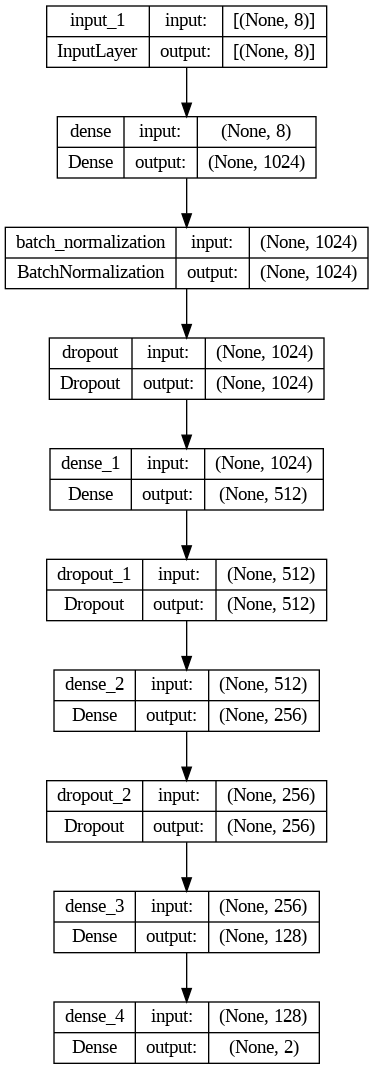

In [ ]:
plot_model(model, to_file='model_architecture.png', show_shapes=True)

In [ ]:
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)

x_test = tf.convert_to_tensor(x_test)
y_test = tf.convert_to_tensor(y_test)

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import datetime

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

time_now = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

checkpoint_callback = ModelCheckpoint(
    filepath=f'/checkpoint/dnn_{time_now}',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

earlystopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min',
    restore_best_weights=True,
    verbose=1
)

## Model Training with Several Conditions

In [ ]:
# Using transmit power and callback function without tx_power (10 augmented value)
history = model.fit(x=x_train, y=y_train, epochs=55, validation_split=0.2, callbacks=[reduce_lr, checkpoint_callback, earlystopping_callback], shuffle=True)

Epoch 1/55
311/314 [============================>.] - ETA: 0s - loss: 0.1212 - mse: 0.1212 - mae: 0.2870
Epoch 1: val_loss improved from inf to 0.23946, saving model to /checkpoint/dnn_20230818_022521
314/314 [==============================] - 6s 12ms/step - loss: 0.1210 - mse: 0.1210 - mae: 0.2868 - val_loss: 0.2395 - val_mse: 0.2395 - val_mae: 0.4167 - lr: 0.0010
Epoch 2/55
313/314 [============================>.] - ETA: 0s - loss: 0.0933 - mse: 0.0933 - mae: 0.2501
Epoch 2: val_loss improved from 0.23946 to 0.10417, saving model to /checkpoint/dnn_20230818_022521
314/314 [==============================] - 4s 13ms/step - loss: 0.0933 - mse: 0.0933 - mae: 0.2501 - val_loss: 0.1042 - val_mse: 0.1042 - val_mae: 0.2682 - lr: 0.0010
Epoch 3/55
312/314 [============================>.] - ETA: 0s - loss: 0.0834 - mse: 0.0834 - mae: 0.2338
Epoch 3: val_loss improved from 0.10417 to 0.07202, saving model to /checkpoint/dnn_20230818_022521
314/314 [==============================] - 4s 13ms/step

In [ ]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_30 (Dense)            (None, 1024)              9216      
                                                                 
 batch_normalization_6 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dropout_18 (Dropout)        (None, 1024)              0         
                                                                 
 dense_31 (Dense)            (None, 512)               524800    
                                                                 
 dropout_19 (Dropout)        (None, 512)               0         
                                                           

In [ ]:
model.save('10augmented_reg_best_3.h5')
files.download('10augmented_reg_best_3.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
eval = model.evaluate(x_test, y_test)

loss = eval[0]

98/98 [==============================] - 0s 3ms/step - loss: 0.0336 - mse: 0.0336 - mae: 0.1125


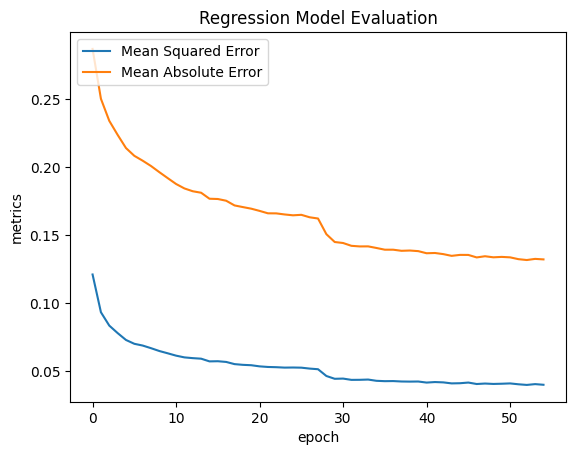

In [ ]:
plt.plot(history.history['mse'])
plt.plot(history.history['mae'])
plt.title('Regression Model Evaluation')
plt.ylabel('metrics')
plt.xlabel('epoch')
plt.legend(['Mean Squared Error', 'Mean Absolute Error'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(x_test)

98/98 [==============================] - 0s 2ms/step


In [ ]:
import matplotlib.pyplot as plt

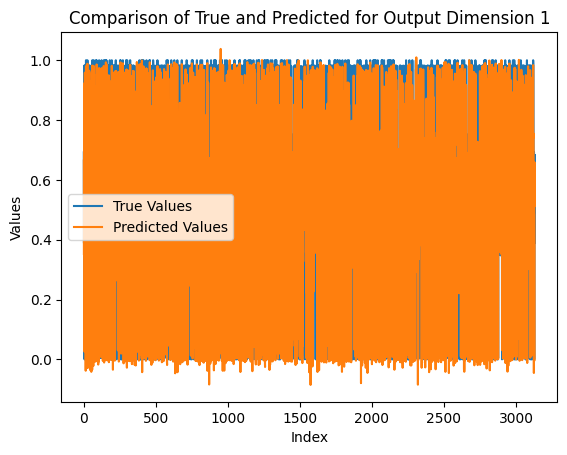

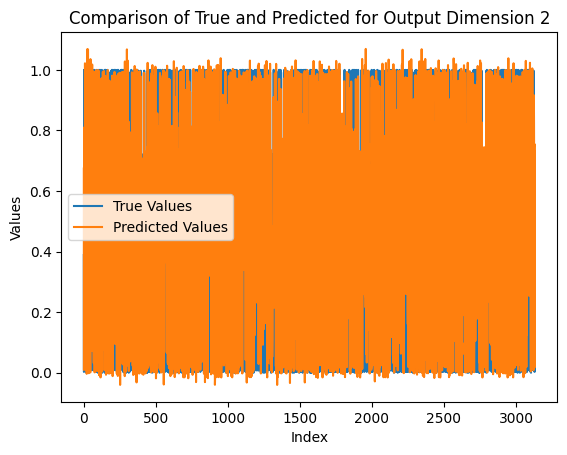

In [ ]:
for i in range(y_test.shape[1]):
    plt.figure()
    plt.plot(y_test[:, i], label='True Values')
    plt.plot(pred[:, i], label='Predicted Values')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title(f'Comparison of True and Predicted for Output Dimension {i + 1}')
    plt.legend()
    plt.show()

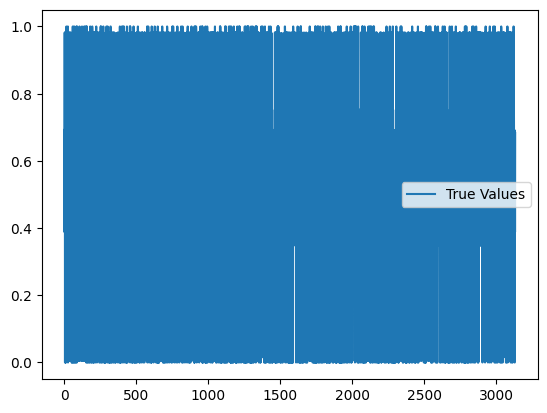

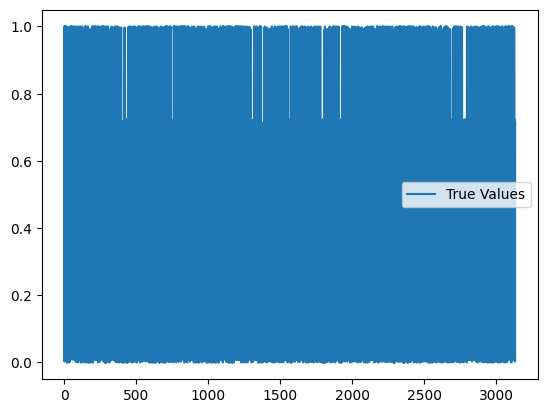

In [ ]:
for i in range(y_test.shape[1]):
  plt.figure()
  plt.plot(y_test[:, i], label='True Values')
  plt.legend()
  plt.show()

In [ ]:
# Label 1: [0.388392856969214, 0.00271739046430027]

rss_1 = 0.109078893630699
rss_2 = 0
rss_3 = 0.0339409689971435
rss_4 = 0
rss_5 = 0.559906441432032
rss_6 = 0
rss_7 = 0
rss_8 = 0.0339409689971435
cur_eirp = 9.0

sample_data = np.array([[rss_1, rss_2, rss_3, rss_4, rss_5, rss_6, rss_7, rss_8]])
predicted_output = model.predict(sample_data)

print(f'Predicted Coord: {predicted_output[0]}')

1/1 [==============================] - 0s 109ms/step
Predicted Coord: [0.37383598 0.00688066]


In [ ]:
# Label 2: [0.388392856969214, 0.00271739046430027]

rss_1 = 0.109078893630699
rss_2 = 0.0661429366972387
rss_3 = 0.0339409689971435
rss_4 = 0
rss_5 = 0.549172452198667
rss_6 = 0
rss_7 = 0
rss_8 = 0
cur_eirp = 9.0

sample_data = np.array([[rss_1, rss_2, rss_3, rss_4, rss_5, rss_6, rss_7, rss_8]])
predicted_output = model.predict(sample_data)

print(f'Predicted Coord: {predicted_output[0]}')

1/1 [==============================] - 0s 19ms/step
Predicted Coord: [0.39205074 0.00978564]


In [ ]:
# Label 3: [0.388392856969214, 0.00271739046430027]

rss_1 = 0.130546872097429
rss_2 = 0.0661429366972387
rss_3 = 0.0232069797637784
rss_4 = 0
rss_5 = 0.538438462965302
rss_6 = 0.0983449043973339
rss_7 = 0
rss_8 = 0
cur_eirp = 9.0

sample_data = np.array([[rss_1, rss_2, rss_3, rss_4, rss_5, rss_6, rss_7, rss_8]])
predicted_output = model.predict(sample_data)

print(f'Predicted Coord: {predicted_output[0]}')

1/1 [==============================] - 0s 22ms/step
Predicted Coord: [ 0.40921134 -0.01561709]


In [ ]:
# Label 4: [0.388392856969214, 0.00271739046430027]

rss_1 = 0.119812882864064
rss_2 = 0.0768769259306038
rss_3 = 0.0446749582305086
rss_4 = 0
rss_5 = 0.559906441432032
rss_6 = 0.0876109151639689
rss_7 = 0
rss_8 = 0
cur_eirp = 9.0

sample_data = np.array([[rss_1, rss_2, rss_3, rss_4, rss_5, rss_6, rss_7, rss_8]])
predicted_output = model.predict(sample_data)

print(f'Predicted Coord: {predicted_output[0]}')

1/1 [==============================] - 0s 18ms/step
Predicted Coord: [0.3869151  0.00173064]


In [ ]:
rss_1 = 0.0876109151639689
rss_2 = 0.0768769259306038
rss_3 = 0.0339409689971435
rss_4 = 0
rss_5 = 0.559906441432032
rss_6 = 0.109078893630699
rss_7 = 0
rss_8 = 0.0446749582305086
cur_eirp = 9.0

sample_data = np.array([[rss_1, rss_2, rss_3, rss_4, rss_5, rss_6, rss_7, rss_8]])
predicted_output = model.predict(sample_data)

print(f'Predicted Coord: {predicted_output[0]}')

1/1 [==============================] - 0s 27ms/step
Predicted Coord: [0.37892222 0.00513425]


In [ ]:
y_pred = np.array([[0.37652224, 0.01335993],
                   [0.3701099,  0.01017022],
                   [4.2633557e-01, -2.3293495e-04],
                   [0.38272572, 0.00843853],
                   [0.38499746, -0.00347942]])

y_test = np.array([0.388392856969214, 0.00271739046430027])

# Calculate the Mean Squared Error (MSE)
mse = np.mean((y_pred - y_test) ** 2)

print(f"Mean Squared Error (MSE): {mse:.6f}")

Mean Squared Error (MSE): 0.000221


In [ ]:
import math
import numpy as np

xr_min = 47.11497625
xr_max = 1102.490646
yr_min = 1269.452828
yr_max = 2136.380872
tar_min = 0
tar_max = 1

def inverse_normalize(value, orig_min, orig_max, target_min, target_max):
    normalized_value = (value - target_min) / (target_max - target_min)
    original_value = normalized_value * (orig_max - orig_min) + orig_min
    return original_value

def inverse_normalize_xr(x):
    return inverse_normalize(x, xr_min, xr_max, tar_min, tar_max)

def inverse_normalize_yr(x):
    return inverse_normalize(x, yr_min, yr_max, tar_min, tar_max)

In [ ]:
# Apply inverse normalization functions to x and y coordinates
inverse_transformed = np.vectorize(inverse_normalize_xr)(y_pred[:, 0]), \
                      np.vectorize(inverse_normalize_yr)(y_pred[:, 1])

In [ ]:
for i in range(len(y_pred)):
    print(f"Original (x, y): {y_pred[i]}, Inverse Transformed (xr, yr): {inverse_transformed[0][i], inverse_transformed[1][i]}")

Original (x, y): [0.37652224 0.01335993], Inverse Transformed (xr, yr): (444.48738746577027, 1281.034925982877)
Original (x, y): [0.3701099  0.01017022], Inverse Transformed (xr, yr): (437.7199598436055, 1278.2696769316497)
Original (x, y): [ 4.2633557e-01 -2.3293495e-04], Inverse Transformed (xr, yr): (497.059163976998, 1269.2508901594172)
Original (x, y): [0.38272572 0.00843853], Inverse Transformed (xr, yr): (451.03438932555093, 1276.7684263071353)
Original (x, y): [ 0.38499746 -0.00347942], Inverse Transformed (xr, yr): (453.4319284495489, 1266.4364212251455)


In [ ]:
# Using transmit power and callback function without tx_power (2 augmented value)
model.fit(x=x_train, y=y_train, epochs=100, validation_split=0.2, callbacks=[reduce_lr, checkpoint_callback, earlystopping_callback], shuffle=True)

Epoch 1/100
80/86 [==========================>...] - ETA: 0s - loss: 0.1507 - mse: 0.1507 - accuracy: 0.5707
Epoch 1: val_loss improved from inf to 0.35196, saving model to /checkpoint/dnn_20230817_132154
86/86 [==============================] - 4s 23ms/step - loss: 0.1487 - mse: 0.1487 - accuracy: 0.5717 - val_loss: 0.3520 - val_mse: 0.3520 - val_accuracy: 0.4773 - lr: 0.0010
Epoch 2/100
81/86 [===========================>..] - ETA: 0s - loss: 0.1133 - mse: 0.1133 - accuracy: 0.6319
Epoch 2: val_loss improved from 0.35196 to 0.30375, saving model to /checkpoint/dnn_20230817_132154
86/86 [==============================] - 3s 30ms/step - loss: 0.1124 - mse: 0.1124 - accuracy: 0.6373 - val_loss: 0.3037 - val_mse: 0.3037 - val_accuracy: 0.5403 - lr: 0.0010
Epoch 3/100
81/86 [===========================>..] - ETA: 0s - loss: 0.1069 - mse: 0.1069 - accuracy: 0.6512
Epoch 3: val_loss improved from 0.30375 to 0.25911, saving model to /checkpoint/dnn_20230817_132154
86/86 [====================

In [ ]:
model.save('2augmented_reg_best.h5')
files.download('2augmented_reg_best.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Using transmit power and callback function without tx_power (2 augmented value)
model.fit(x=x_train, y=y_train, epochs=50, validation_split=0.2, callbacks=[reduce_lr, checkpoint_callback, earlystopping_callback], shuffle=True)

Epoch 1/50
81/86 [===========================>..] - ETA: 0s - loss: 0.2131 - mse: 0.2131 - accuracy: 0.5691
Epoch 1: val_loss improved from inf to 0.35637, saving model to /checkpoint/dnn_20230817_131419
86/86 [==============================] - 4s 22ms/step - loss: 0.2092 - mse: 0.2092 - accuracy: 0.5739 - val_loss: 0.3564 - val_mse: 0.3564 - val_accuracy: 0.5520 - lr: 0.0010
Epoch 2/50
84/86 [============================>.] - ETA: 0s - loss: 0.1158 - mse: 0.1158 - accuracy: 0.6280
Epoch 2: val_loss improved from 0.35637 to 0.31318, saving model to /checkpoint/dnn_20230817_131419
86/86 [==============================] - 2s 20ms/step - loss: 0.1156 - mse: 0.1156 - accuracy: 0.6296 - val_loss: 0.3132 - val_mse: 0.3132 - val_accuracy: 0.5007 - lr: 0.0010
Epoch 3/50
85/86 [============================>.] - ETA: 0s - loss: 0.1057 - mse: 0.1057 - accuracy: 0.6559
Epoch 3: val_loss improved from 0.31318 to 0.26005, saving model to /checkpoint/dnn_20230817_131419
86/86 [=======================

In [ ]:
# Using transmit power and callback function without tx_power (2 augmented value)
model.fit(x=x_train, y=y_train, epochs=40, validation_split=0.2, callbacks=[reduce_lr, checkpoint_callback, earlystopping_callback], shuffle=True)

Epoch 1/40
82/86 [===========================>..] - ETA: 0s - loss: 0.2947 - mse: 0.2947 - accuracy: 0.5777
Epoch 1: val_loss improved from inf to 0.37827, saving model to /checkpoint/dnn_20230817_131233
86/86 [==============================] - 4s 28ms/step - loss: 0.2923 - mse: 0.2923 - accuracy: 0.5776 - val_loss: 0.3783 - val_mse: 0.3783 - val_accuracy: 0.5798 - lr: 0.0010
Epoch 2/40
81/86 [===========================>..] - ETA: 0s - loss: 0.1924 - mse: 0.1924 - accuracy: 0.6069
Epoch 2: val_loss improved from 0.37827 to 0.33875, saving model to /checkpoint/dnn_20230817_131233
86/86 [==============================] - 2s 20ms/step - loss: 0.1918 - mse: 0.1918 - accuracy: 0.6076 - val_loss: 0.3388 - val_mse: 0.3388 - val_accuracy: 0.5564 - lr: 0.0010
Epoch 3/40
80/86 [==========================>...] - ETA: 0s - loss: 0.1380 - mse: 0.1380 - accuracy: 0.6570
Epoch 3: val_loss improved from 0.33875 to 0.24580, saving model to /checkpoint/dnn_20230817_131233
86/86 [=======================

In [ ]:
# Using transmit power and callback function without tx_power (10 augmented value) -- best so far
model.fit(x=x_train, y=y_train, epochs=40, validation_split=0.2, callbacks=[reduce_lr, checkpoint_callback, earlystopping_callback], shuffle=True)

Epoch 1/40
313/314 [============================>.] - ETA: 0s - loss: 0.1158 - mse: 0.1158 - accuracy: 0.6408
Epoch 1: val_loss improved from inf to 0.26397, saving model to /checkpoint/dnn_20230817_130816
314/314 [==============================] - 6s 14ms/step - loss: 0.1159 - mse: 0.1159 - accuracy: 0.6407 - val_loss: 0.2640 - val_mse: 0.2640 - val_accuracy: 0.6323 - lr: 0.0010
Epoch 2/40
305/314 [============================>.] - ETA: 0s - loss: 0.0848 - mse: 0.0848 - accuracy: 0.7136
Epoch 2: val_loss improved from 0.26397 to 0.10068, saving model to /checkpoint/dnn_20230817_130816
314/314 [==============================] - 3s 9ms/step - loss: 0.0848 - mse: 0.0848 - accuracy: 0.7137 - val_loss: 0.1007 - val_mse: 0.1007 - val_accuracy: 0.6966 - lr: 0.0010
Epoch 3/40
304/314 [============================>.] - ETA: 0s - loss: 0.0761 - mse: 0.0761 - accuracy: 0.7260
Epoch 3: val_loss improved from 0.10068 to 0.07218, saving model to /checkpoint/dnn_20230817_130816
314/314 [============

In [ ]:
# Using transmit power and callback function (10 augmented value)
model.fit(x=x_train, y=y_train, epochs=35, validation_split=0.2, callbacks=[reduce_lr, checkpoint_callback, earlystopping_callback], shuffle=True)

Epoch 1/35
310/314 [============================>.] - ETA: 0s - loss: 0.1285 - mse: 0.1285 - accuracy: 0.6295
Epoch 1: val_loss improved from inf to 0.26471, saving model to /checkpoint/dnn_20230817_130515
314/314 [==============================] - 11s 16ms/step - loss: 0.1282 - mse: 0.1282 - accuracy: 0.6297 - val_loss: 0.2647 - val_mse: 0.2647 - val_accuracy: 0.5437 - lr: 0.0010
Epoch 2/35
308/314 [============================>.] - ETA: 0s - loss: 0.0965 - mse: 0.0965 - accuracy: 0.6719
Epoch 2: val_loss improved from 0.26471 to 0.13454, saving model to /checkpoint/dnn_20230817_130515
314/314 [==============================] - 3s 9ms/step - loss: 0.0966 - mse: 0.0966 - accuracy: 0.6723 - val_loss: 0.1345 - val_mse: 0.1345 - val_accuracy: 0.6100 - lr: 0.0010
Epoch 3/35
308/314 [============================>.] - ETA: 0s - loss: 0.0884 - mse: 0.0884 - accuracy: 0.6986
Epoch 3: val_loss improved from 0.13454 to 0.09592, saving model to /checkpoint/dnn_20230817_130515
314/314 [===========

In [ ]:
# Using batchnormalization and callback function (10 augmented value)
model.fit(x=x_train, y=y_train, epochs=15, validation_split=0.2, callbacks=[reduce_lr], shuffle=True)

Epoch 1/15
314/314 [==============================] - 3s 10ms/step - loss: 0.0517 - accuracy: 0.7765 - val_loss: 0.0463 - val_accuracy: 0.7709 - lr: 0.0010
Epoch 2/15
314/314 [==============================] - 2s 8ms/step - loss: 0.0507 - accuracy: 0.7796 - val_loss: 0.0463 - val_accuracy: 0.7717 - lr: 0.0010
Epoch 3/15
314/314 [==============================] - 2s 7ms/step - loss: 0.0507 - accuracy: 0.7801 - val_loss: 0.0481 - val_accuracy: 0.7824 - lr: 0.0010
Epoch 4/15
314/314 [==============================] - 2s 8ms/step - loss: 0.0498 - accuracy: 0.7754 - val_loss: 0.0471 - val_accuracy: 0.7796 - lr: 0.0010
Epoch 5/15
314/314 [==============================] - 3s 10ms/step - loss: 0.0490 - accuracy: 0.7832 - val_loss: 0.0449 - val_accuracy: 0.7820 - lr: 0.0010
Epoch 6/15
314/314 [==============================] - 3s 10ms/step - loss: 0.0481 - accuracy: 0.7845 - val_loss: 0.0444 - val_accuracy: 0.7956 - lr: 0.0010
Epoch 7/15
314/314 [==============================] - 2s 8ms/step -

In [ ]:
# Using dropout (10 augmented value)
model.fit(x=x_train, y=y_train, epochs=15, validation_split=0.2, shuffle=True)

Epoch 1/15
314/314 [==============================] - 4s 10ms/step - loss: 0.2100 - accuracy: 0.5110 - val_loss: 0.0976 - val_accuracy: 0.6152
Epoch 2/15
314/314 [==============================] - 3s 11ms/step - loss: 0.0920 - accuracy: 0.6546 - val_loss: 0.0815 - val_accuracy: 0.6850
Epoch 3/15
314/314 [==============================] - 2s 7ms/step - loss: 0.0814 - accuracy: 0.6951 - val_loss: 0.0729 - val_accuracy: 0.6870
Epoch 4/15
314/314 [==============================] - 2s 7ms/step - loss: 0.0740 - accuracy: 0.7261 - val_loss: 0.0662 - val_accuracy: 0.7609
Epoch 5/15
314/314 [==============================] - 2s 7ms/step - loss: 0.0689 - accuracy: 0.7391 - val_loss: 0.0625 - val_accuracy: 0.7872
Epoch 6/15
314/314 [==============================] - 2s 8ms/step - loss: 0.0654 - accuracy: 0.7485 - val_loss: 0.0599 - val_accuracy: 0.6954
Epoch 7/15
314/314 [==============================] - 3s 11ms/step - loss: 0.0625 - accuracy: 0.7505 - val_loss: 0.0585 - val_accuracy: 0.7924
Epo

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 519)               4671      
                                                                 
 dropout_3 (Dropout)         (None, 519)               0         
                                                                 
 dense_19 (Dense)            (None, 300)               156000    
                                                                 
 dropout_4 (Dropout)         (None, 300)               0         
                                                                 
 dense_20 (Dense)            (None, 100)               30100     
                                                                 
 dense_21 (Dense)            (None, 2)                 202       
                                                                 
Total params: 190,973
Trainable params: 190,973
Non-tr

In [ ]:
# Using dropout (5 augmented value)
model.fit(x=x_train, y=y_train, epochs=15, validation_split=0.2, shuffle=True)

Epoch 1/15
171/171 [==============================] - 3s 13ms/step - loss: 0.1256 - accuracy: 0.5939 - val_loss: 0.0976 - val_accuracy: 0.6032
Epoch 2/15
171/171 [==============================] - 2s 10ms/step - loss: 0.0951 - accuracy: 0.6536 - val_loss: 0.0921 - val_accuracy: 0.6984
Epoch 3/15
171/171 [==============================] - 1s 7ms/step - loss: 0.0887 - accuracy: 0.6724 - val_loss: 0.0878 - val_accuracy: 0.7094
Epoch 4/15
171/171 [==============================] - 1s 7ms/step - loss: 0.0843 - accuracy: 0.6898 - val_loss: 0.0799 - val_accuracy: 0.7079
Epoch 5/15
171/171 [==============================] - 1s 7ms/step - loss: 0.0793 - accuracy: 0.7059 - val_loss: 0.0775 - val_accuracy: 0.7020
Epoch 6/15
171/171 [==============================] - 2s 12ms/step - loss: 0.0759 - accuracy: 0.7225 - val_loss: 0.0702 - val_accuracy: 0.7570
Epoch 7/15
171/171 [==============================] - 2s 14ms/step - loss: 0.0721 - accuracy: 0.7339 - val_loss: 0.0664 - val_accuracy: 0.7548
Ep

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 519)               4671      
                                                                 
 dropout_1 (Dropout)         (None, 519)               0         
                                                                 
 dense_15 (Dense)            (None, 300)               156000    
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               30100     
                                                                 
 dense_17 (Dense)            (None, 2)                 202       
                                                                 
Total params: 190,973
Trainable params: 190,973
Non-tr

In [ ]:
# Without dropout layer (5 augmented value)
model.fit(x=x_train, y=y_train, epochs=15, validation_split=0.2, shuffle=True)

Epoch 1/15
171/171 [==============================] - 2s 7ms/step - loss: 0.1200 - accuracy: 0.5944 - val_loss: 0.0968 - val_accuracy: 0.6179
Epoch 2/15
171/171 [==============================] - 1s 7ms/step - loss: 0.0915 - accuracy: 0.6574 - val_loss: 0.0877 - val_accuracy: 0.6369
Epoch 3/15
171/171 [==============================] - 1s 6ms/step - loss: 0.0848 - accuracy: 0.6773 - val_loss: 0.0838 - val_accuracy: 0.6523
Epoch 4/15
171/171 [==============================] - 1s 7ms/step - loss: 0.0795 - accuracy: 0.7042 - val_loss: 0.0794 - val_accuracy: 0.7079
Epoch 5/15
171/171 [==============================] - 2s 10ms/step - loss: 0.0743 - accuracy: 0.7161 - val_loss: 0.0779 - val_accuracy: 0.6376
Epoch 6/15
171/171 [==============================] - 2s 10ms/step - loss: 0.0716 - accuracy: 0.7295 - val_loss: 0.0707 - val_accuracy: 0.7299
Epoch 7/15
171/171 [==============================] - 2s 10ms/step - loss: 0.0675 - accuracy: 0.7368 - val_loss: 0.0677 - val_accuracy: 0.7526
Epo

## Download the Data

In [ ]:
filtered_data.to_csv('10_augmented_value_rss.csv')
filtered_data.to_excel('10_augmented_value_rss.xlsx')